# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

In [1]:
#import your libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk

#your info here
__author__ = "Raktim Barua"
__email__ = "raktim.barua@outlook.co.nz"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
!ls

01_DataPrep.ipynb
Salary Prediction Interview Assignment.docx
Script.ipynb
data
modules
salary-prediction-eda.html
untitled folder


In [3]:
#load the data into a Pandas dataframe
train_target_df = pd.read_csv("data/train_salaries.csv")
train_feature_df = pd.read_csv("data/train_features.csv")
test_feature_df = pd.read_csv("data/test_features.csv")

In [4]:
train_feature_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
test_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


## Check for Duplocates

In [10]:
train_feature_df.duplicated().sum()

0

In [11]:
train_target_df.duplicated().sum()

0

In [12]:
test_feature_df.duplicated().sum()

0

## Identify numerical and categorical variables

In [13]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [14]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']

In [15]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

## Summerize numerical and categorical variables seperately

In [16]:
train_feature_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [17]:
train_feature_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685225538,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


## Merge features and targets into single df (optional: delete original dfs)

In [18]:
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

In [19]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [20]:
del train_feature_df
del train_target_df

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [22]:
train_df.isna().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

## Visualize target variables (salary)

In [23]:
def plot_histogram(df, feature):
    fig = plt.figure(figsize=(15,7))
    plt.suptitle('Distribution of '+ feature, fontsize=20)
    plt.subplot(1,2,1)
    sns.distplot(df[feature], kde=True, bins=20, color='#127D5D')
    plt.subplot(1,2,2)
    sns.boxplot(df[feature], color='#127D5D')
    plt.show()
    return

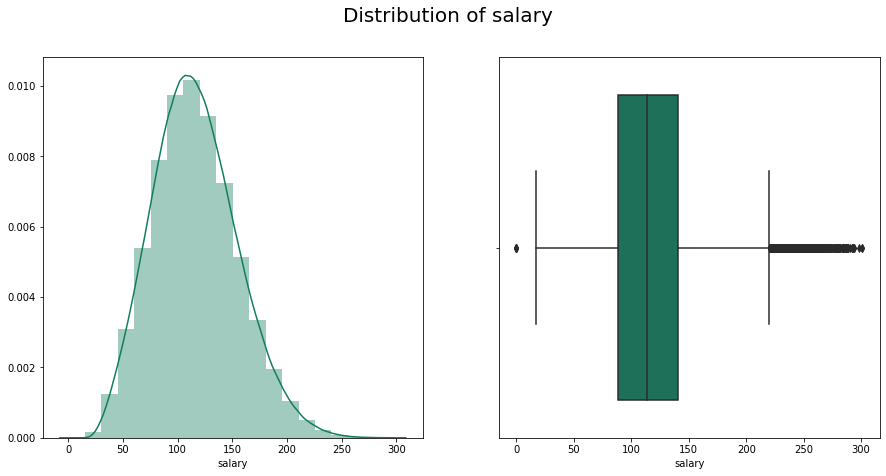

In [24]:
plot_histogram(train_df, "salary")

## USe IQr rule to identify potential outliers

In [25]:
stat = train_df.salary.describe()
print(stat)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64


In [26]:
IQR = stat['75%'] - stat['25%']
upper =stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print(f'The upper and lower bounds for suspected outliers are {upper} and {lower}.')

The upper and lower bounds for suspected outliers are 220.5 and 8.5.


## Examine potential outliers

In [27]:
# Chack potential outlier below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [28]:
#check potential outlier above upper bound
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [29]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


These entries with zero salary do not appear to be volunteer positions. We are confident that they are instances of missing/corrupt data and should be removed from the training set.

The high-salary potential outliers all appear to be legitimate data. Most roles are C-level executive roles and the junior positions are in industries that are well known for high salaries (oil, finance). We determine these entries to be legitimate and will not remove them.

In [30]:
# Remove data with zero salaries
train_df = train_df[(train_df.salary <=222.5) & (train_df.salary > 8.5)]

In [31]:
train_df.shape

(993722, 9)

In [32]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

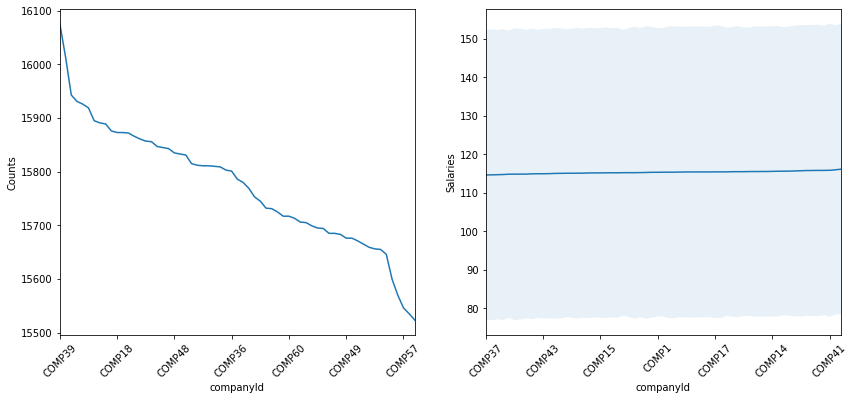

In [33]:
plot_feature(train_df, 'companyId')

#### The salary is weekly associated with companies.

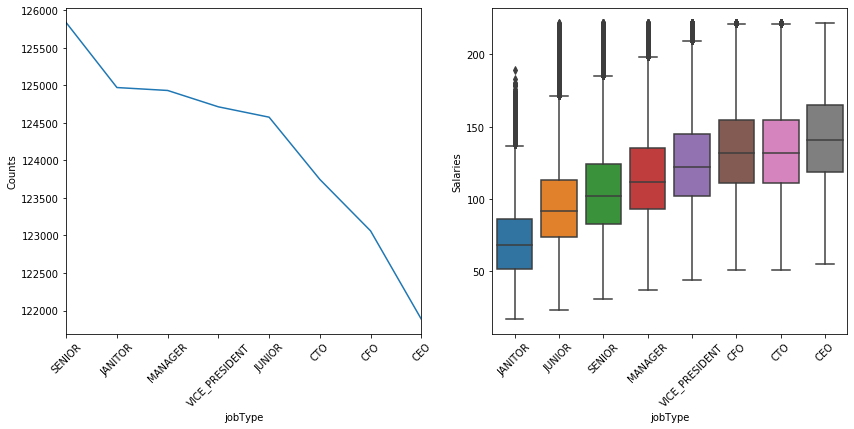

In [34]:
plot_feature(train_df, 'jobType')

#### There is a clear positive correlation between job type and salary.

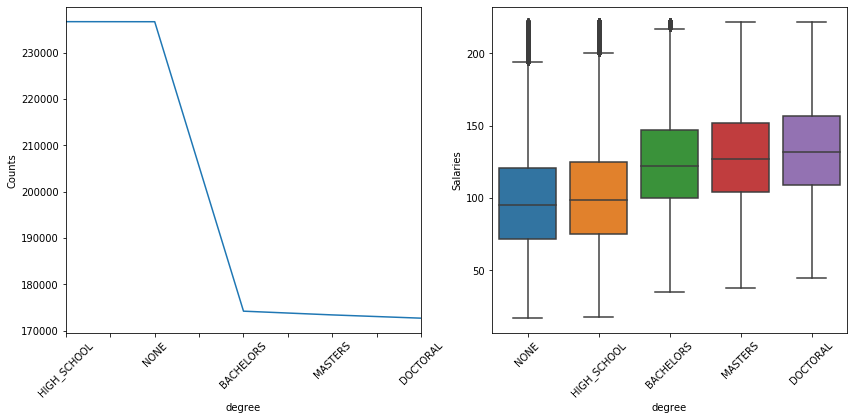

In [35]:
plot_feature(train_df, 'degree')

#### More advanced degrees tend to correspond to higher salaries.

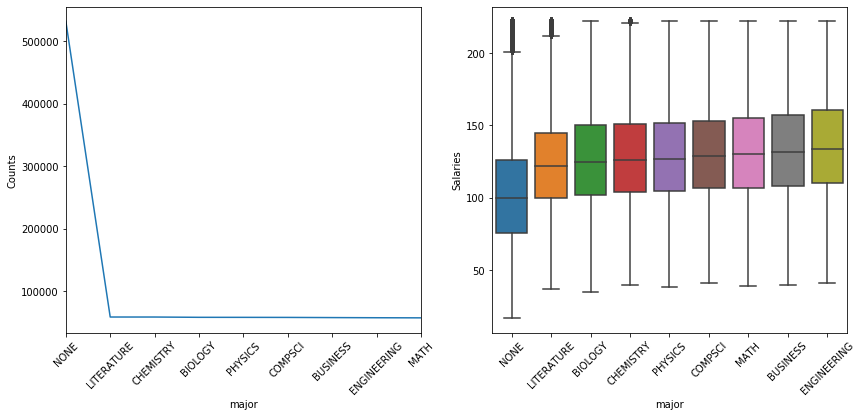

In [36]:
plot_feature(train_df, 'major')

#### People with majors of Engineering, business and math generally have higher salaries.

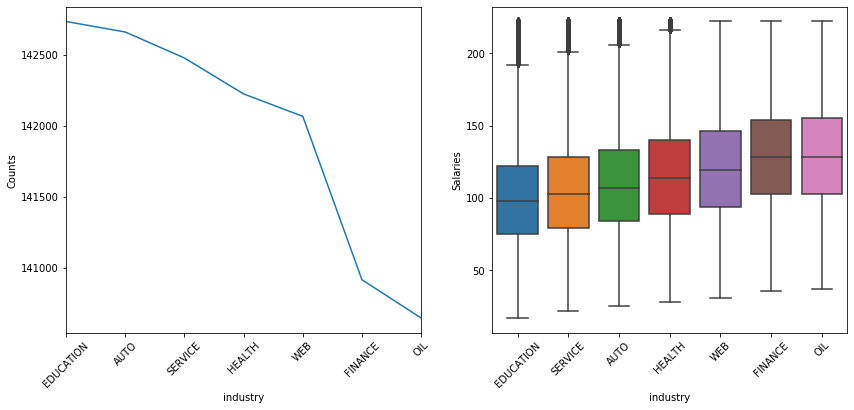

In [37]:
plot_feature(train_df, 'industry')

#### As for industries, oil, finance and web industries generally pay better.

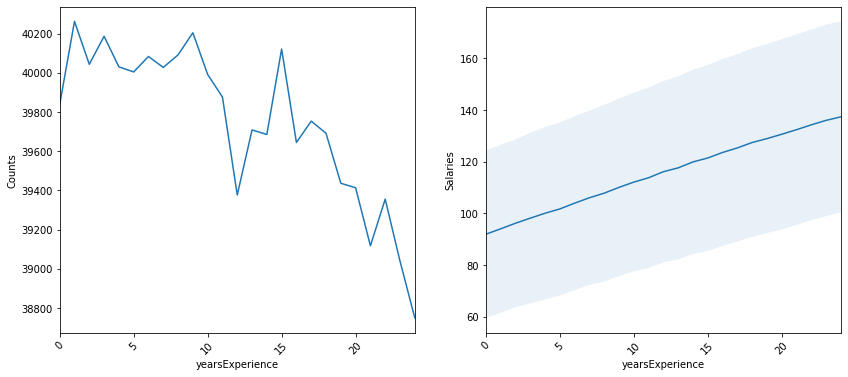

In [38]:
plot_feature(train_df, 'yearsExperience')

#### In general, there is a clear correlation between salary and years of experience.

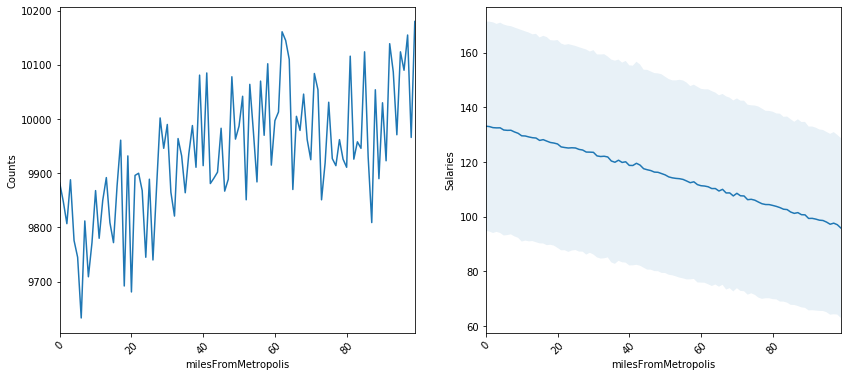

In [39]:
plot_feature(train_df, 'milesFromMetropolis')

#### In general, salaries decrease with the distance to metropolis.

In [46]:
train_df.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993722 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  993722 non-null object
companyId              993722 non-null category
jobType                993722 non-null category
degree                 993722 non-null category
major                  993722 non-null category
industry               993722 non-null category
yearsExperience        993722 non-null int64
milesFromMetropolis    993722 non-null int64
salary                 993722 non-null int64
dtypes: category(5), int64(3), object(1)
memory usage: 82.7+ MB


In [41]:
means = train_df.groupby('jobType').mean().sort_values('salary').reset_index()
means

,jobType,yearsExperience,milesFromMetropolis,salary
0,JANITOR,11.969657,49.443815,70.813045
1,JUNIOR,11.991001,49.665618,95.315871
2,SENIOR,11.992562,49.588099,105.437657
3,MANAGER,11.973217,49.552156,115.191312
4,VICE_PRESIDENT,11.956364,49.565366,124.915447
5,CFO,11.900578,49.894638,134.394349
6,CTO,11.924184,49.894034,134.429780
7,CEO,11.817705,50.114961,143.120786


In [62]:
train_df['salary'].mean()

115.30342288889649

In [63]:
cat_dict = {}
cats = train_df['major'].cat.categories.tolist()
for cat in cats:
    cat_dict[cat] = round(train_df[train_df['major'] == cat]['salary'].mean())
train_df['major'] = train_df['major'].map(cat_dict)
train_df['major']

0         132
1         102
2         129
3         128
4         129
         ... 
999995    128
999996    102
999997    102
999998    102
999999    102
Name: major, Length: 993722, dtype: category
Categories (9, int64): [102, 124, 127, 128, ..., 131, 132, 134, 136]

In [64]:
cat_dict

{102: 102,
 124: 124,
 127: 127,
 128: 128,
 129: 129,
 131: 131,
 132: 132,
 134: 134,
 136: 136}

In [100]:
def encode_label(df,feature,target):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[feature].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = round(train_df[train_df[col] == cat]['salary'].mean())
    df[features+"_categorical"] = df[col].map(cat_dict)
    return df,cat_dict

In [103]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df,"jobType","salary" )

AttributeError: Can only use .cat accessor with a 'category' dtype

In [67]:
# def ordinal_encode(df,feature,target):
#     means = df.groupby(feature).mean().sort_values(target).reset_index()
#     output_mapper = {}
#     for index,row in means.iterrows():
#         output_mapper[row[feature]] = index+1
#     df[feature+"_categorical"] = df[feature].replace(output_mapper)
#     return df,output_mapper

In [68]:
# m = ordinal_encode(train_df, "jobType", "salary")
# m

In [69]:
train_df.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115,134,129,132,115,10,83,130
1,JOB1362684407688,115,143,102,102,121,3,73,101
2,JOB1362684407689,116,125,134,129,115,10,38,137
3,JOB1362684407690,115,115,134,128,109,8,17,142
4,JOB1362684407691,115,125,125,129,129,8,16,163
5,JOB1362684407692,115,115,134,131,129,2,31,113
6,JOB1362684407693,115,134,98,102,115,23,24,178
7,JOB1362684407694,116,95,125,128,99,9,70,73
8,JOB1362684407695,115,71,102,102,99,1,54,31
9,JOB1362684407696,116,125,125,128,109,17,68,104


In [70]:
train_df1 = train_df.drop(columns=['jobId', 'salary'])

In [71]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993722 entries, 0 to 999999
Data columns (total 7 columns):
companyId              993722 non-null int64
jobType                993722 non-null int64
degree                 993722 non-null category
major                  993722 non-null category
industry               993722 non-null int64
yearsExperience        993722 non-null int64
milesFromMetropolis    993722 non-null int64
dtypes: category(2), int64(5)
memory usage: 87.4 MB


In [72]:
train_df1['degree'] = pd.to_numeric(train_df1['degree'],errors='coerce')

In [73]:
train_df1['major'] = pd.to_numeric(train_df1['major'],errors='coerce')

In [74]:
train_df1.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,115,134,129,132,115,10,83
1,115,143,102,102,121,3,73
2,116,125,134,129,115,10,38
3,115,115,134,128,109,8,17
4,115,125,125,129,129,8,16


In [75]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993722 entries, 0 to 999999
Data columns (total 7 columns):
companyId              993722 non-null int64
jobType                993722 non-null int64
degree                 993722 non-null int64
major                  993722 non-null int64
industry               993722 non-null int64
yearsExperience        993722 non-null int64
milesFromMetropolis    993722 non-null int64
dtypes: int64(7)
memory usage: 100.7 MB


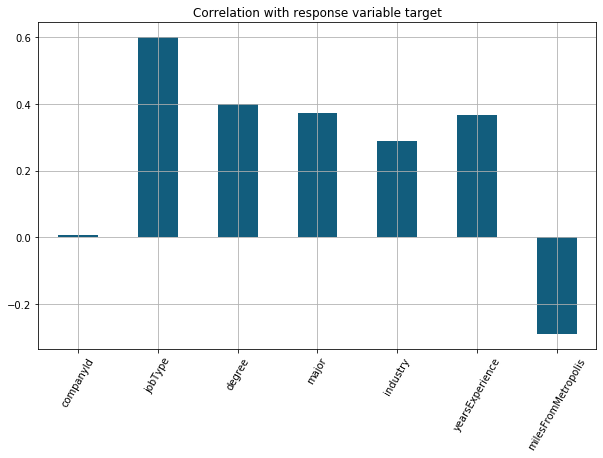

In [76]:
train_df1.corrwith(train_df.salary).plot.bar(
figsize=(10,6), title = "Correlation with response variable target",
fontsize=10, rot=60, grid=True, color='#125D7D')
plt.show()

In [77]:
# Correlation matrix
sns.set(style='white')
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
corr = train_df[features + ['salary']].corr()

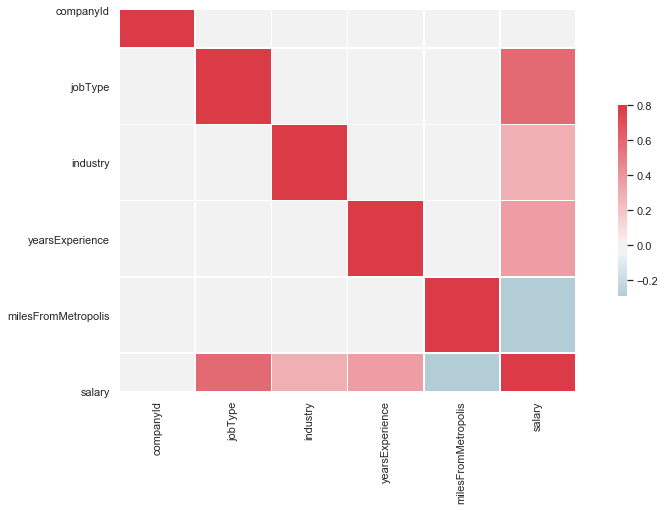

In [78]:
# Set up matplotlib figure
f , ax = plt.subplots(figsize=(15, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=0.8, center=0,
         square=True, linewidths=0.8, cbar_kws={"shrink": .5})
plt.show()

Here we can see that there is a negetive relation between our target variable `salary` and `milesFromMetropolis`, therefore we can drop the column `milesFromMetropolis`.

In [79]:
train_df_final = train_df.drop(columns=['jobId','milesFromMetropolis', 'companyId'])

In [80]:
train_df_final.head()

,jobType,degree,major,industry,yearsExperience,salary
0,134,129,132,115,10,130
1,143,102,102,121,3,101
2,125,134,129,115,10,137
3,115,134,128,109,8,142
4,125,125,129,129,8,163


In [81]:
train_df_final.shape

(993722, 6)

In [82]:
X = train_df_final[['jobType','degree','major','industry','yearsExperience']]

In [83]:
y= train_df_final['salary']

In [84]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [86]:
from sklearn.model_selection import cross_val_score

In [97]:
lin_scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error",n_jobs=-1,verbose=1,cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished


In [98]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [99]:
lin_rmse_scores

array([22.57668502, 22.57682617, 22.47897582, 22.55635845, 22.59710319,
       22.62361242, 22.48998939, 22.47450691, 22.47031806, 22.51631528])

In [103]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, y_pred) 

NameError: name 'y_test' is not defined

In [ ]:
MSE

### ---- 3 Clean the data ----

In [42]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
df.describe()

,salary,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000,1000000.000000
mean,116.061818,11.992386,49.529260
std,38.717936,7.212391,28.877733
min,0.000000,0.000000,0.000000
25%,88.000000,6.000000,25.000000
50%,114.000000,12.000000,50.000000
75%,141.000000,18.000000,75.000000
max,301.000000,24.000000,99.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
salary                 1000000 non-null int64
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [54]:
df_greater_than_zero = df[df['salary'] > 0]

In [56]:
df_greater_than_zero.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [60]:
df_greater_than_zero.columns


Index(['jobId', 'salary', 'companyId', 'jobType', 'degree', 'major',
       'industry', 'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [61]:
df_work = df_greater_than_zero.drop(columns=['jobId', 'companyId'])

In [62]:
df_work.shape

(999995, 7)

In [63]:
df_work.head()

,salary,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,130,CFO,MASTERS,MATH,HEALTH,10,83
1,101,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,137,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,142,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,163,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.bar(range(df.shape[0]), np.sort(df['salary'].values))
plt.show()

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data